In [23]:
# pandas for dataframe ,numpy as np,matplotlib.pyplot
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [11]:
df = pd.read_csv('home_price_list.csv')
df


,area,price
0,454,67988
1,567,86666
2,587,87938
3,532,78999
4,453,68836
5,563,88333


In [12]:
df[['area']]

,area
0,454
1,567
2,587
3,532
4,453
5,563


In [13]:
area_new = df['area']
price_new = df['price']

In [14]:
print(area_new,price_new)

0    454
1    567
2    587
3    532
4    453
5    563
Name: area, dtype: int64 0    67988
1    86666
2    87938
3    78999
4    68836
5    88333
Name: price, dtype: int64


In [15]:
x = np.array(area_new).reshape(-1,1)
y = np.array(price_new)

In [19]:
from sklearn.model_selection import train_test_split 
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=1/3, random_state=0)

In [20]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression()
regressor.fit(xtrain, ytrain)

LinearRegression()

In [21]:
pred = regressor.predict(xtest)

In [22]:
pred

array([85121.0967545 , 88827.96378065])

In [14]:
print(x,"next",y)

[[454]
 [567]
 [587]
 [532]
 [453]
 [563]] next [67988 86666 87938 78999 68836 88333]


In [17]:
x.dim

AttributeError: 'numpy.ndarray' object has no attribute 'dim'

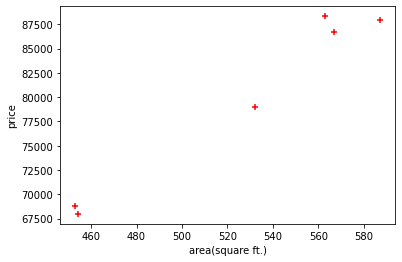

In [4]:
%matplotlib inline
plt.xlabel("area(square ft.)")
plt.ylabel("price")
plt.scatter(df.area ,df.price,color = "red",marker="+")

In [ ]:
reg = linear_model.LinearRegression()
reg.fit(df.area,df.price)

In [5]:
reg = linear_model.LinearRegression() 
reg.fit(df[['area']],df.price)    # it require 2d array

LinearRegression()

In [ ]:
# reg = linear_model.LinearRegression()
# reg.fit(df[['area']],df[['price']])
# reg.predict(82500)

In [6]:
reg.predict(450)

ValueError: Expected 2D array, got scalar array instead:
array=450.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [7]:
reg.predict([[450]])

array([67771.66474211])

In [8]:
reg.coef_

array([158.17984988])

In [9]:
reg.intercept_

-3409.2677059276175

In [ ]:
feature  scaling

In [ ]:
simple imputer is use to handle missing value

In [25]:
df = pd.read_csv('50_Startups.csv')
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [ ]:
encode your categorical variable
encoding methods:- one hot encoding()